In [878]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



## Project Summary: Superstore Sales Data Analysis and PCA

This project analyzes a comprehensive sales dataset from a supermarket to uncover key patterns and insights using data exploration and Principal Component Analysis (PCA).

**Objectives:**
- Explore the sales, profit, discount, and order data to understand trends over time and across categories.
- Visualize customer segments, shipping modes, and product categories to identify behavioral patterns.
- Prepare the dataset for dimensionality reduction by cleaning and transforming date columns.
- Apply PCA to reduce feature dimensionality while preserving maximum variance, facilitating visualization and interpretation.
- Evaluate PCA components via explained variance, loading plots, and scatter plots to interpret data structure.
- Assess how well PCA components separate customer segments in both 2D and 3D visualizations.
- Discuss limitations of PCA for classification in this context and suggest advanced techniques for better segmentation.

By combining exploratory data analysis and PCA, the project aims to simplify complex multivariate data and provide actionable insights for business decision-making.


In [879]:
Market_data = pd.read_csv(
    r"C:\Users\User\Desktop\Supermarket data\Sample - Superstore.csv",
    sep=',',
    on_bad_lines='skip',
    encoding='latin1'
)
Market_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 📥 Importing the Dataset

The dataset is loaded from a local CSV file using the `pandas` library. The file contains sales data from a fictional superstore. 

- The encoding is set to `'latin1'` to handle special characters that may not be compatible with the default UTF-8.
- The parameter `on_bad_lines='skip'` ensures that any rows with formatting errors are ignored during the import process.
- The `sep=','` indicates that the file is comma-separated.
- After importing, the `.head()` method is used to preview the first few rows of the dataset.


In [880]:
#etelate data
Market_data.shape
Market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### 🧾 Dataset Structure Overview

To understand the overall structure of the dataset, we check:

- `.shape`: This returns the number of rows and columns in the dataset as a tuple `(rows, columns)`.
- `.info()`: This provides a concise summary including:
  - Column names
  - Data types (e.g., int, float, object)
  - Non-null counts
  - Memory usage

These commands help verify the dataset’s completeness and identify any missing values or inconsistent data types early in the analysis.


In [881]:
Market_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 📊 Descriptive Statistics

The `.describe()` method generates summary statistics for the numerical columns in the dataset, including:

- **Count**: Number of non-null entries
- **Mean**: Average value
- **Std**: Standard deviation (measure of spread)
- **Min / Max**: Minimum and maximum values
- **25% / 50% / 75%**: Percentiles (also known as quartiles)

This helps to quickly understand the distribution and scale of numerical features such as `Sales`, `Profit`, and `Discount`.


In [882]:
# tabdil type saat ha va tarikha be format pandas

Market_data['Order Date'] = pd.to_datetime(Market_data['Order Date'],format ='%m/%d/%Y')
Market_data['Ship Date'] = pd.to_datetime(Market_data['Ship Date'],format = '%m/%d/%Y')

### 🕒 Converting Date Columns to `datetime` Format

The columns `Order Date` and `Ship Date` are converted from string format to proper `datetime` objects using `pandas.to_datetime()`.

- This allows for easy extraction of components such as year, month, and day.
- The format `'%m/%d/%Y'` specifies that the dates are in the format: month/day/year.

This step is essential for any time-series analysis or date-based grouping and filtering.


In [883]:
# joda kardan tarikh kharid

Market_data['OrderY'] = Market_data['Order Date'].dt.year
Market_data['OrderM'] = Market_data['Order Date'].dt.month
Market_data['OrderD'] = Market_data['Order Date'].dt.day

### 📆 Extracting Year, Month, and Day from Order Date

To enable time-based analysis, the `Order Date` column is split into three separate columns:

- `OrderY`: Extracts the year of the order.
- `OrderM`: Extracts the month of the order.
- `OrderD`: Extracts the day of the month.

These new features are useful for trend analysis, seasonal insights, and creating time-based groupings or visualizations.


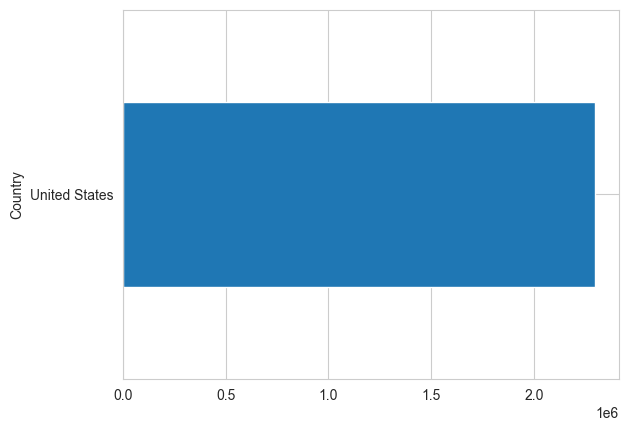

In [884]:
Market_data.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20).plot.barh();

### 🌍 Top 20 Countries by Total Sales

This line of code groups the dataset by the `Country` column and calculates the total `Sales` for each country. The countries are then sorted in descending order, and the top 20 are visualized using a horizontal bar chart.

This visualization helps identify the most profitable markets and provides a clear comparison of sales performance across different countries.


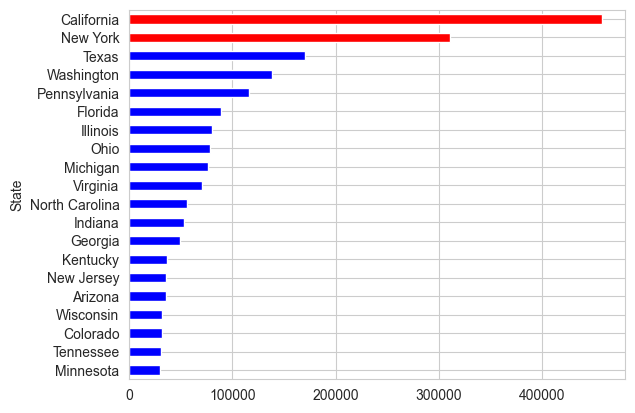

In [885]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
Market_data.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

### 🏙️ Top 20 States by Sales with Custom Color Highlighting

This code visualizes the top 20 states based on total sales using a horizontal bar chart. The steps involved are:

- The data is grouped by the `State` column, and total `Sales` are computed.
- The states are sorted in ascending order, and the top 20 are selected using `.tail(20)`.
- A list of custom colors is defined: most bars are colored **blue**, while the two highest-selling states are highlighted in **red** for emphasis.

This kind of color-coding helps draw attention to specific data points within a chart, making key insights more visually apparent.


<Axes: ylabel='Sales'>

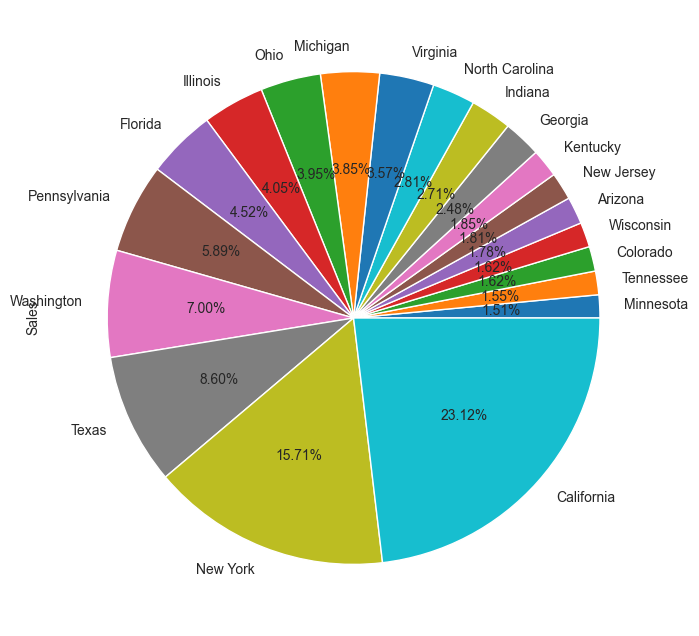

In [886]:
 # rasm nemoodare daiereii
plt.figure(figsize=(12, 8))
Market_data.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot(kind = "pie",autopct = "%1.2f%%")

### 🥧 Pie Chart of Top 20 States by Sales

This chart displays a pie chart of the top 20 U.S. states by total `Sales`. Here's what it does:

- The dataset is grouped by the `State` column and aggregated by the total `Sales`.
- The top 20 states (with the highest sales) are selected using `.tail(20)` after sorting.
- A pie chart is plotted using `plot(kind="pie")`, with the `autopct` parameter set to show percentages up to two decimal places.

This visualization provides a clear and intuitive view of how sales are distributed among the top-performing states.


In [887]:
# mohasebe tedad ravesh ersal ha

Market_data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

### 🚚 Frequency of Shipping Methods

This operation uses `.value_counts()` on the `Ship Mode` column to calculate how many times each shipping method appears in the dataset.

It provides a quick summary of:

- The popularity or frequency of different delivery methods (e.g., Standard Class, Second Class, etc.)
- Potential preferences of customers or operational focus of the business.

This insight can guide decisions around logistics and customer service optimization.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\1461209124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ship Mode', data=Market_data, palette=colors)


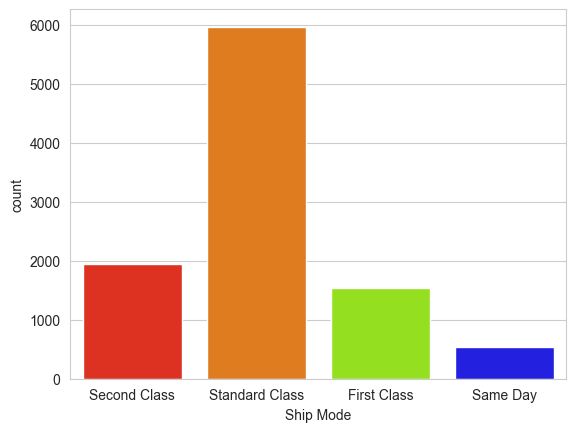

In [888]:
#  rasm nemoodar rvesg ersal
colors = ["#FC1803", "#FF7B00", "#99FF004C", "#0400FF"]
sns.countplot(x='Ship Mode', data=Market_data, palette=colors)
plt.show()


### 📦 Countplot of Shipping Methods with Custom Colors

This visualization displays a count plot of the `Ship Mode` column, representing the number of orders for each shipping method.

- The `sns.countplot()` function is used from Seaborn to create a bar chart based on the frequency of each category.
- A custom color palette is applied using the `palette` parameter for visual distinction between the bars.
- This plot helps to quickly identify the most and least commonly used shipping methods.

Such visualizations are useful in understanding customer delivery preferences and operational usage.


In [889]:
# shomaresh tedad kharid ha ke bar koja boode 
Market_data['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

### 👥 Purchase Count by Customer Segment

The `.value_counts()` method is applied to the `Segment` column to count how many transactions belong to each customer segment.

- Common segments typically include categories like `Consumer`, `Corporate`, and `Home Office`.
- This breakdown helps understand the distribution of purchases among different types of customers.
- It can also reveal which segment drives the most business activity.

This is a fundamental step in customer segmentation analysis.


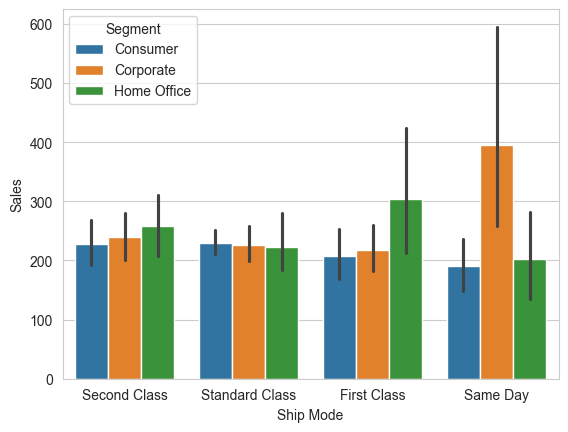

In [890]:
# basari sazi hamoon balii ha hame ba ham yani segment va ship mode va sales


sns.barplot(x="Ship Mode",y = "Sales",hue="Segment",data=Market_data)
plt.show()

### 📊 Sales by Shipping Mode and Customer Segment

This bar plot visualizes total `Sales` segmented by both `Ship Mode` and `Segment`.

- The x-axis shows different shipping methods (`Ship Mode`).
- The y-axis represents the sales amount.
- The `hue="Segment"` parameter breaks down the sales further by customer segments such as `Consumer`, `Corporate`, and `Home Office`.
- This layered view helps to understand how sales vary across different shipping methods for each customer segment.

Such plots provide valuable insights into the interplay between delivery options and customer types.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\4250867795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category",palette= color,data=Market_data)


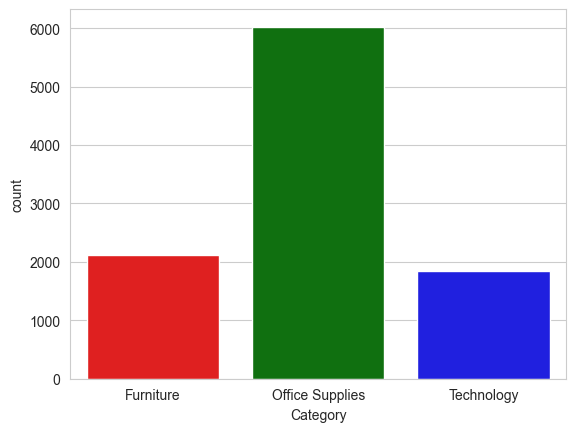

In [891]:
#nemoodare type kharid ha 

color = ['red','green','blue']
sns.countplot(x="Category",palette= color,data=Market_data)
plt.show()

### 🛒 Count of Purchases by Product Category

This count plot shows the frequency of purchases across different product categories.

- The `Category` column contains groups like `Furniture`, `Technology`, and `Office Supplies`.
- The `sns.countplot()` function from Seaborn is used to create the bar chart.
- A custom color palette (`red`, `green`, `blue`) is applied for visual clarity and distinction between categories.
- This helps identify which product categories are most commonly bought.

Such plots are useful for product mix analysis and inventory planning.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\1165180673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sub-Category", data=Market_data[Market_data["Category"] == "Office Supplies"], palette="Set2")


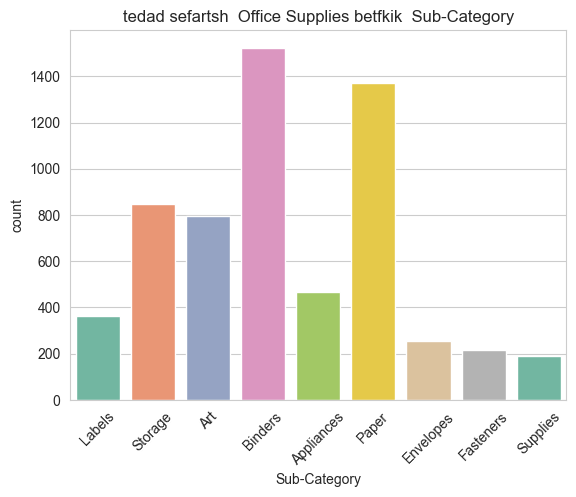

In [892]:
# har sefarsh bara che kari dade shode be che andaze?

sns.countplot(x="Sub-Category", data=Market_data[Market_data["Category"] == "Office Supplies"], palette="Set2")
plt.xticks(rotation=45)
plt.title("tedad sefartsh  Office Supplies betfkik  Sub-Category")
plt.show()


### 🗂️ Order Counts for Office Supplies by Sub-Category

This count plot focuses on the `Office Supplies` category, showing the number of orders for each `Sub-Category` within it.

- The dataset is filtered to include only rows where `Category` equals `Office Supplies`.
- The x-axis displays different `Sub-Category` values (e.g., Binders, Paper, etc.).
- A color palette `"Set2"` is applied for better visual distinction.
- The x-axis labels are rotated 45 degrees for better readability.
- The plot title describes the focus on order counts within Office Supplies sub-categories.

This plot helps identify which specific types of office supplies are most frequently ordered.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\3817889818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sub-Category", data=Market_data[Market_data["Category"] == "Technology"], palette="Set2")


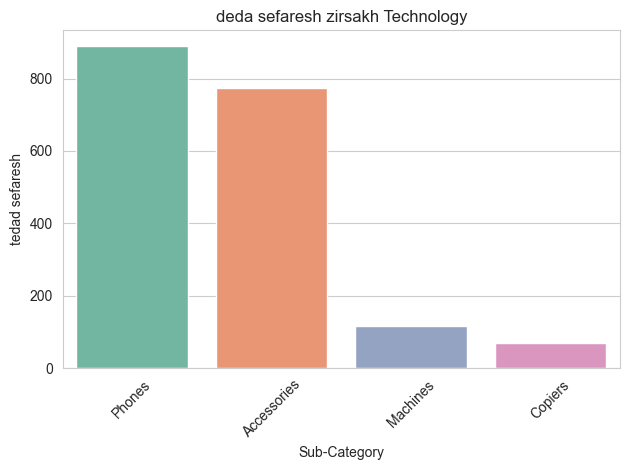

In [893]:
# hamoon olgoo baraye Technology.


sns.set_style("whitegrid")

sns.countplot(x="Sub-Category", data=Market_data[Market_data["Category"] == "Technology"], palette="Set2")
plt.xticks(rotation=45)
plt.title("deda sefaresh zirsakh Technology")
plt.xlabel("Sub-Category")
plt.ylabel("tedad sefaresh")
plt.tight_layout()
plt.show()

### 💻 Order Counts for Technology by Sub-Category

This plot shows the distribution of orders within the `Technology` category, broken down by `Sub-Category`.

- The dataset is filtered for rows where `Category` is `Technology`.
- The x-axis lists the various `Sub-Category` values under Technology (such as Phones, Accessories, etc.).
- The `sns.countplot()` function with the `"Set2"` palette creates a colorful bar chart.
- The `whitegrid` style improves readability by adding grid lines.
- X-axis labels are rotated 45 degrees for better visualization.
- Axis labels and title clearly describe the data.

This visualization provides insight into which technology sub-categories have the highest order volumes.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\1215651131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sub-Category", data=Market_data[Market_data["Category"] == "Furniture"], palette="Set3")


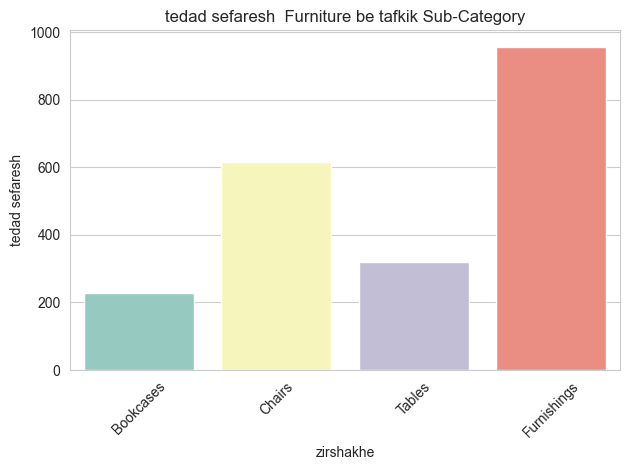

In [894]:
# hamoon dastan ghabli inbar ba Furniture


sns.countplot(x="Sub-Category", data=Market_data[Market_data["Category"] == "Furniture"], palette="Set3")
plt.title("tedad sefaresh  Furniture be tafkik Sub-Category")
plt.xticks(rotation=45)
plt.xlabel("zirshakhe")
plt.ylabel("tedad sefaresh")
plt.tight_layout()
plt.show()


### 🛋️ Order Counts for Furniture by Sub-Category

This visualization shows the count of orders within the `Furniture` category, segmented by `Sub-Category`.

- The data is filtered to include only entries where `Category` equals `Furniture`.
- The x-axis represents the different furniture sub-categories (e.g., Chairs, Tables).
- The color palette `"Set3"` is applied for a pleasant and varied color scheme.
- X-axis labels are rotated 45 degrees for clarity.
- Axis labels and title clearly explain the chart content.
- `plt.tight_layout()` ensures the plot elements are neatly arranged without overlap.

This plot helps identify which furniture items are most popular among customers.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\1042897730.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\User\AppData\Local\Temp\ipykernel_3468\1042897730.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\User\AppData\Local\Temp\ipykernel_3468\1042897730.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


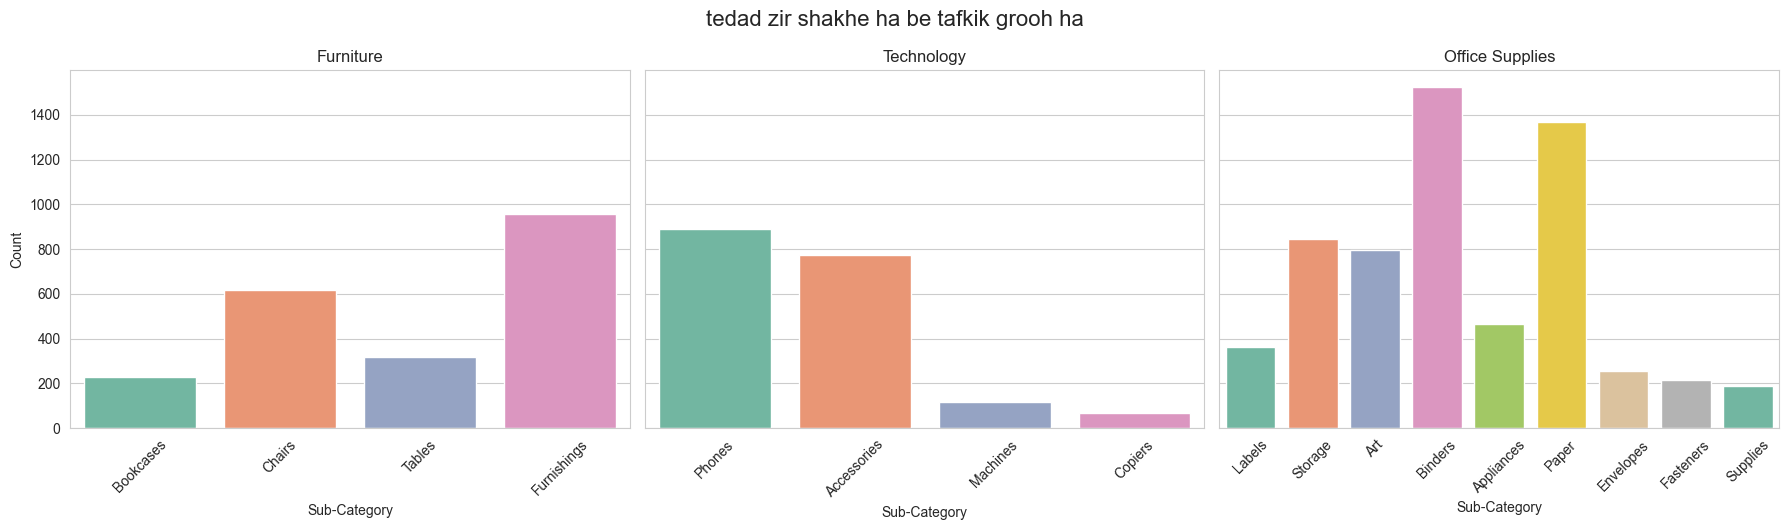

In [895]:
#keshidan setash kenare ham

sns.set_style("whitegrid")


categories = ["Furniture", "Technology", "Office Supplies"]


fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


for i, category in enumerate(categories):
    sns.countplot(
        x="Sub-Category",
        data=Market_data[Market_data["Category"] == category],
        palette="Set2",
        ax=axes[i]
    )
    axes[i].set_title(f"{category}")
    axes[i].set_xlabel("Sub-Category")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("tedad zir shakhe ha be tafkik grooh ha", fontsize=16, y=1.05)
plt.show()

### 📊 Side-by-Side Countplots of Sub-Categories by Main Category

This figure shows three count plots side by side, one for each main product category: `Furniture`, `Technology`, and `Office Supplies`.

- The data is filtered separately for each category inside a loop.
- Each subplot visualizes the counts of orders per `Sub-Category` within its respective main category.
- The Seaborn `"Set2"` color palette is used consistently across plots.
- X-axis labels are rotated 45 degrees for better readability.
- The y-axis is shared among all subplots for easy comparison.
- A main title (`suptitle`) is added above all subplots to describe the overall figure.
- `plt.tight_layout()` ensures neat spacing without overlap.

This multi-plot visualization facilitates comparison of sub-category order counts across different product groups.


In [896]:
print(Market_data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'OrderY',
       'OrderM', 'OrderD'],
      dtype='object')


In [897]:
# tabdil type time
Market_data['Order Date'] = pd.to_datetime(Market_data['Order Date'], errors='coerce')

# sakht sootoon jadid bara year intori mitoonim bar asas sal tafkik konim
Market_data['Order Year'] = Market_data['Order Date'].dt.year



### ⏳ Converting 'Order Date' and Extracting Year for PCA

- The `Order Date` column is converted to datetime format using `pd.to_datetime()`, with `errors='coerce'` to handle any invalid parsing by setting those values as `NaT` (Not a Time).
- A new column `Order Year` is created by extracting the year component from the `Order Date`.

**Note:**  
There might already be an existing year-related column (e.g., `OrderY`), so technically two columns representing the year may exist in the dataset.  
This duplication is intentional and not a problem because for PCA analysis, having a dedicated and consistently formatted `Order Year` column helps to clearly separate and include the year as a numeric feature.

This approach improves data quality and consistency before dimensionality reduction.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\1531427159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Order Year", y = "Sales", data = Market_data, palette= colors)


<Axes: xlabel='Order Year', ylabel='Sales'>

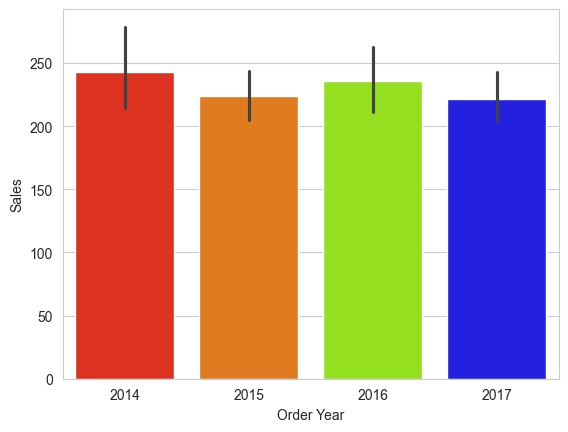

In [898]:
# rasm nemoodare 

sns.barplot(x = "Order Year", y = "Sales", data = Market_data, palette= colors)

### 📈 Yearly Sales Barplot

This bar plot visualizes the total `Sales` aggregated by the `Order Year`.

- The x-axis represents the order year.
- The y-axis shows the sales amount.
- The `sns.barplot()` function is used to plot the data.
- A custom color palette (`colors`) is applied to enhance the visual appeal.

This plot helps identify sales trends over the years and highlights how sales performance has evolved annually.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\1094570549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Order Year", y = "Profit", data= Market_data , palette=colors)


<Axes: xlabel='Order Year', ylabel='Profit'>

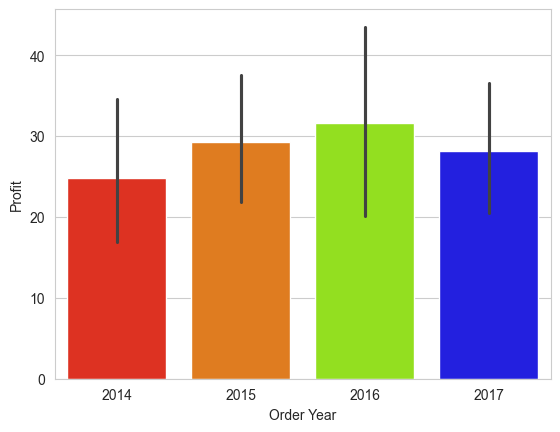

In [899]:
# nemoodare salane bar hasnbe profit va sal /year

sns.barplot(x = "Order Year", y = "Profit", data= Market_data , palette=colors)

### 💰 Annual Profit Barplot

This bar plot shows the total `Profit` for each `Order Year`.

- The x-axis indicates the year of the orders.
- The y-axis displays the profit amount.
- The `sns.barplot()` function is used to visualize the aggregated profits by year.
- The same custom color palette (`colors`) is applied for consistency in design.

This visualization is useful to track profitability trends over time and assess business growth or challenges year by year.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\640083941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Order Year",y="Discount",data=Market_data, palette=colors)


<Axes: xlabel='Order Year', ylabel='Discount'>

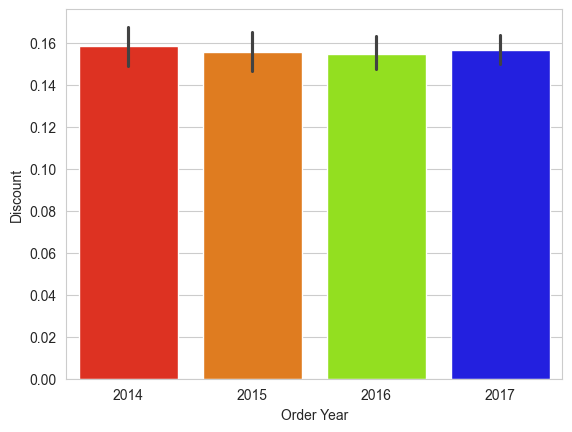

In [900]:
# hasine
sns.barplot(x="Order Year",y="Discount",data=Market_data, palette=colors)

### 💸 Annual Discount Barplot

This bar plot visualizes the total `Discount` offered in each `Order Year`.

- The x-axis represents the year of the orders.
- The y-axis shows the discount amount.
- The `sns.barplot()` function is used to aggregate and display the discount data by year.
- The same custom color palette (`colors`) is applied for visual consistency.

This chart helps analyze how discount strategies have changed over time and their potential impact on sales and profitability.


C:\Users\User\AppData\Local\Temp\ipykernel_3468\667143397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sub-Category",y = "Profit",data=Market_data,estimator = "sum",palette='Set3')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

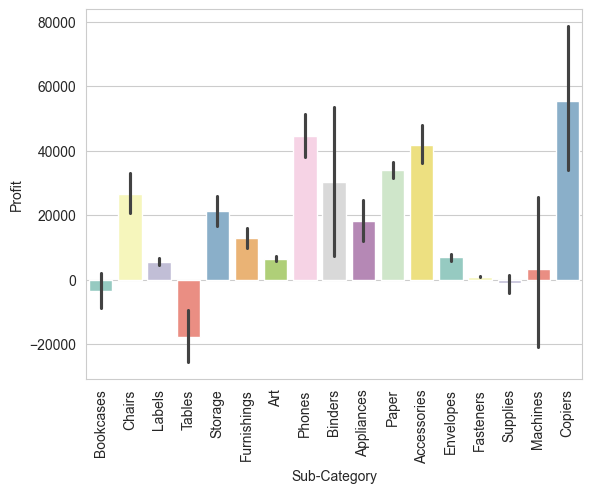

In [901]:
# nemoodare sood nesbat be grooh ha

sns.barplot(x="Sub-Category",y = "Profit",data=Market_data,estimator = "sum",palette='Set3')
plt.xticks(rotation="vertical")

### 💹 Profit by Sub-Category Barplot

This bar plot displays the total `Profit` summed for each `Sub-Category`.

- The x-axis lists different product sub-categories.
- The y-axis shows the aggregated profit values.
- The `estimator='sum'` parameter tells Seaborn to sum profits within each sub-category.
- The `"Set3"` color palette is applied for a diverse and visually appealing set of colors.
- The x-axis labels are rotated vertically for better readability due to potentially long category names.

This plot highlights which product sub-categories are the most and least profitable.


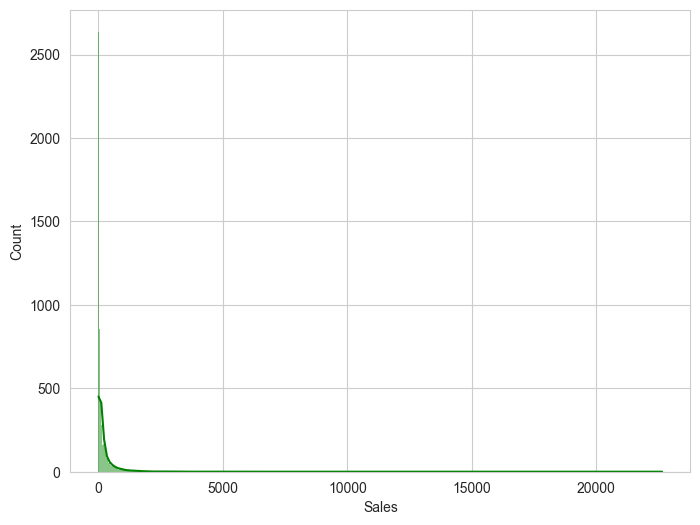

In [902]:
# nemoodare meghdar foroosh dar baze ghamat

plt.figure(figsize=(8,6))
sns.histplot(Market_data["Sales"], kde=True, color="green")
plt.show()


### 📉 Sales Distribution Histogram

This histogram shows the distribution of `Sales` values across all orders.

- The `sns.histplot()` function is used to plot the frequency of sales amounts.
- The `kde=True` parameter adds a Kernel Density Estimate curve to smooth the distribution and visualize its shape.
- The plot is colored green for visual emphasis.
- The figure size is set to make the plot clear and easy to read.

This visualization helps identify the spread, central tendency, and skewness of sales amounts in the dataset.


In [903]:
# shomaresh foroosh dar mantghe joghrafiaii

Market_data["Region"].value_counts()


Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [904]:
# shomaresh tedad kharid masalan 5 ta 5 mahsool

Market_data["Quantity"].value_counts

<bound method IndexOpsMixin.value_counts of 0       2
1       3
2       2
3       5
4       2
       ..
9989    3
9990    2
9991    2
9992    4
9993    2
Name: Quantity, Length: 9994, dtype: int64>

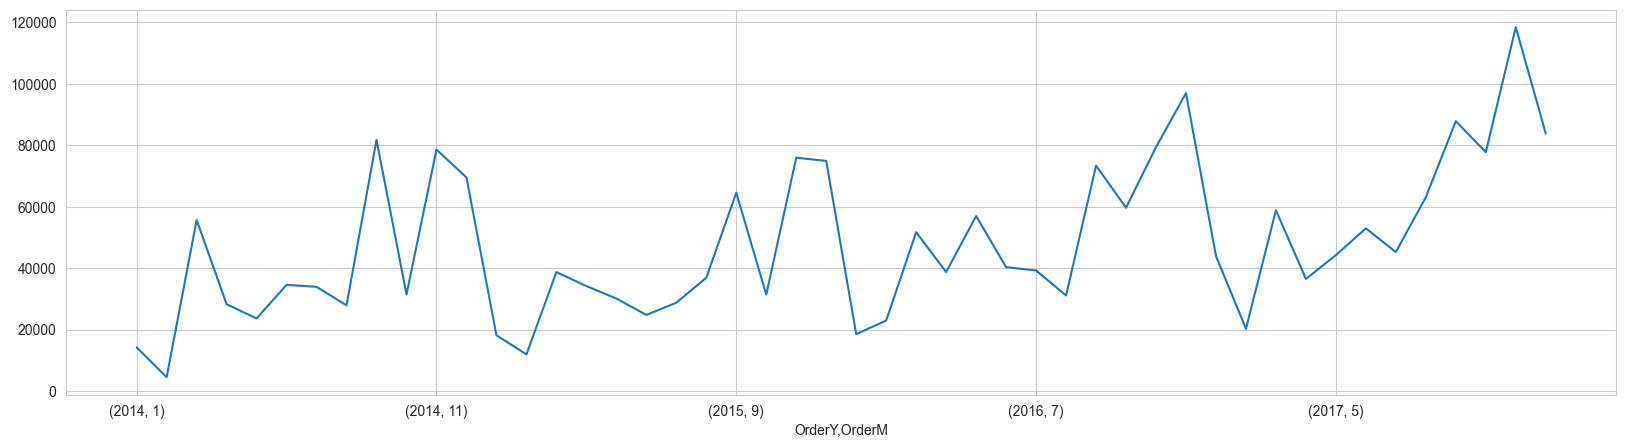

In [905]:
# nemoodare moroosh bar hasbe sal va mah
plt.figure(figsize=(20,5))
Market_data.groupby(['OrderY','OrderM'])['Sales'].sum().plot();


### 📅 Sales Trend by Year and Month

This line plot visualizes the total `Sales` aggregated by both `Order Year (OrderY)` and `Order Month (OrderM)`.

- The data is grouped by year and month to show monthly sales over multiple years.
- The `groupby()` function is used with the columns `OrderY` and `OrderM`, summing the sales for each period.
- The plot shows trends and seasonality in sales, helping to identify peaks and troughs over time.
- The figure size is set wide for better visualization of the time series.

This time-series analysis is crucial for understanding sales patterns and forecasting future demand.


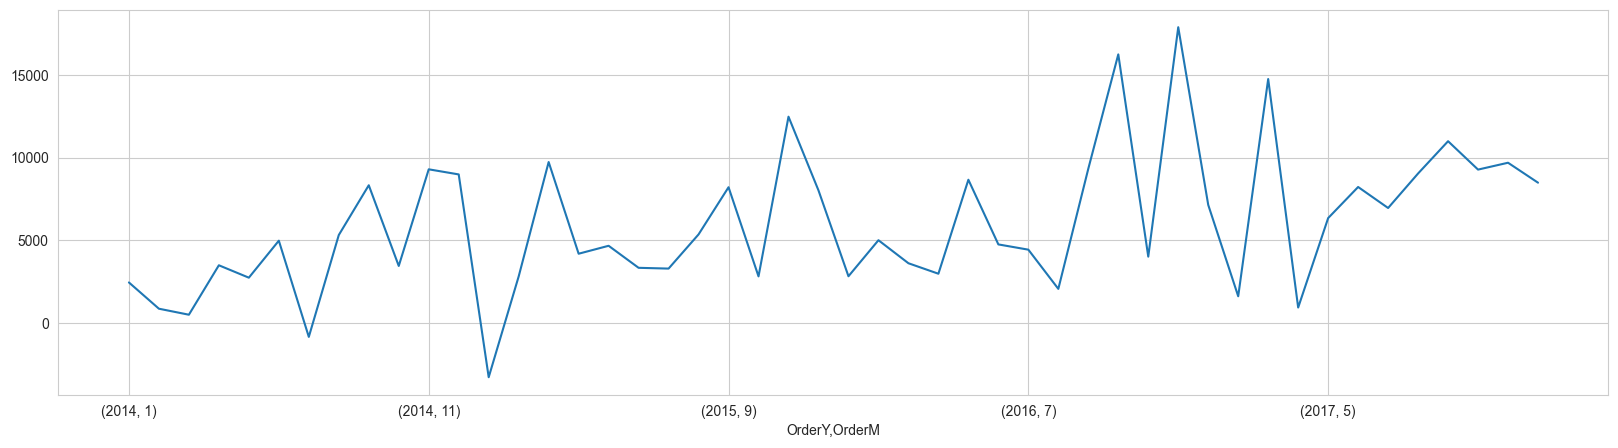

In [906]:
# hamoon mozoo bala dar morede sood

plt.figure(figsize=(20,5))
Market_data.groupby(['OrderY','OrderM'])['Profit'].sum().plot();

### 📈 Profit Trend by Year and Month

This line plot shows the total `Profit` aggregated by `Order Year (OrderY)` and `Order Month (OrderM)`.

- Data is grouped by year and month, and profits are summed for each time period.
- The plot helps visualize profitability trends over time, revealing seasonal patterns or shifts in business performance.
- The wide figure size improves readability for the time series data.

Such time-based profit analysis is essential for strategic planning and identifying periods of high or low profitability.


In [907]:
Market_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderY,OrderM,OrderD,Order Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,2015


In [908]:
# joda sazi baraye pca

cols = ["Sales", "Quantity", "Discount", "Profit", "Order Year", "OrderM"]
PCA_culs = Market_data[cols]

### 🧮 Selecting Features for PCA

For performing Principal Component Analysis (PCA), the following numeric columns are selected from the dataset:

- `Sales`
- `Quantity`
- `Discount`
- `Profit`
- `Order Year`
- `OrderM` (Order Month)

These features represent key numeric variables related to sales performance and time, which PCA will use to identify underlying patterns and reduce dimensionality.

Selecting only relevant numeric columns helps improve the quality and interpretability of the PCA results.


In [909]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(PCA_culs)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

### ⚙️ Data Scaling and PCA Transformation

1. **Standardization:**  
   The selected features (`PCA_culs`) are standardized using `StandardScaler()`.  
   - This process rescales the data so that each feature has a mean of 0 and a standard deviation of 1.  
   - Standardization is essential before PCA because it ensures all features contribute equally, regardless of their original scale.

2. **PCA Execution:**  
   Principal Component Analysis (PCA) is performed with 2 components (`n_components=2`), which reduces the dimensionality of the data from multiple features to 2 principal components.  
   - `fit_transform()` fits the PCA model on the scaled data and applies the dimensionality reduction.  
   - The resulting `pca_result` contains the coordinates of each data point in the new 2D principal component space.

This step simplifies the dataset while preserving the most important variance patterns.


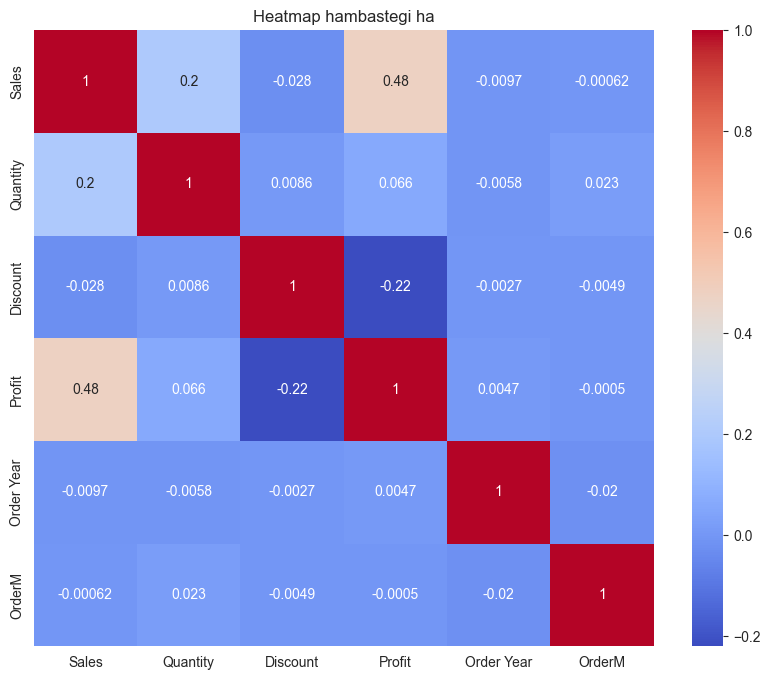

In [910]:
#

plt.figure(figsize=(10,8))
sns.heatmap(PCA_culs.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap hambastegi ha')
plt.show()


### 🌡️ Heatmap of Feature Correlations

This heatmap visualizes the correlation matrix of the selected features (`PCA_culs`):

- The `corr()` function computes pairwise Pearson correlation coefficients between all features.
- The heatmap uses the `coolwarm` colormap to show positive correlations in warm colors (reds) and negative correlations in cool colors (blues).
- The `annot=True` parameter displays the exact correlation values on the heatmap.
- This plot helps identify which features are strongly positively or negatively correlated, an important insight before applying PCA or other multivariate analyses.

Understanding feature correlations can guide feature selection and interpretation of PCA components.


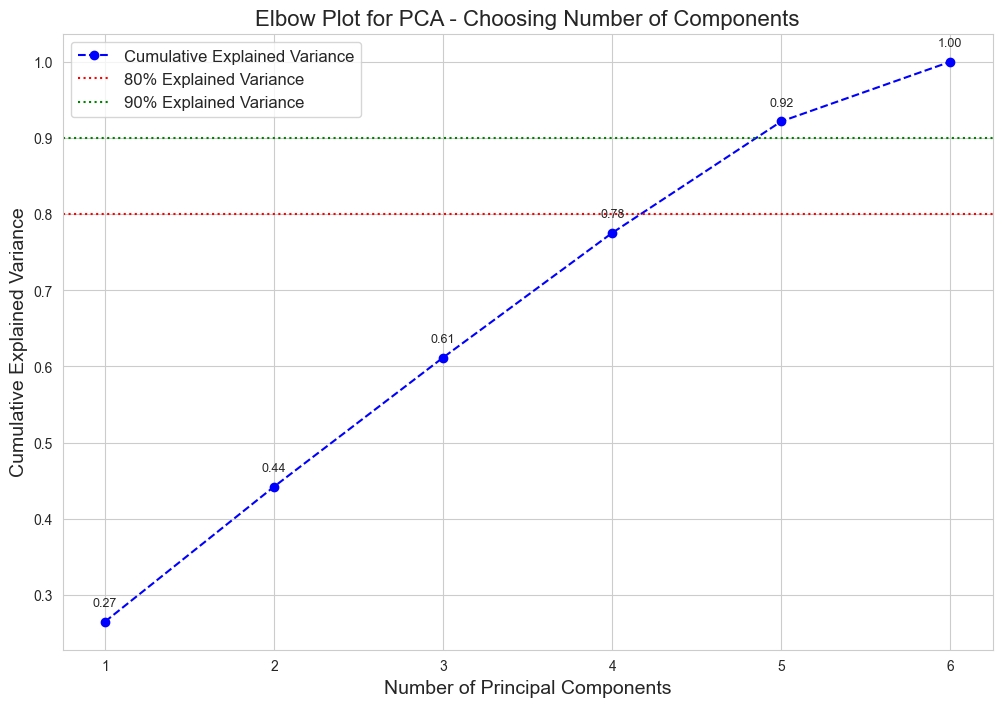

In [911]:
# L-bow plot
n_features = X_scaled.shape[1]


pca = PCA(n_components=n_features)
pca.fit(X_scaled)


explained_variance = pca.explained_variance_ratio_


cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12,8))
plt.plot(range(1, n_features + 1), cumulative_variance, marker='o', linestyle='--', color='b', label='Cumulative Explained Variance')

plt.axhline(y=0.80, color='r', linestyle=':', label='80% Explained Variance')
plt.axhline(y=0.90, color='g', linestyle=':', label='90% Explained Variance')

for i, var in enumerate(cumulative_variance):
    plt.text(i+1, var + 0.02, f"{var:.2f}", ha='center', fontsize=9)

plt.xticks(range(1, n_features + 1))
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Elbow Plot for PCA - Choosing Number of Components', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### 📊 Elbow Plot for PCA: Determining Number of Components

This plot visualizes the **cumulative explained variance ratio** as a function of the number of principal components:

- `n_features` is the total number of features used in PCA.
- PCA is fit using all features to calculate explained variance for each principal component.
- The **cumulative explained variance** (`np.cumsum`) shows how much total variance is captured when including up to each component.
- The plot:
  - X-axis: Number of principal components.
  - Y-axis: Cumulative explained variance (proportion of variance captured).
  - Markers and dashed line help visualize the trend.
- Horizontal dashed lines mark the 80% (red) and 90% (green) explained variance thresholds, common cutoffs for selecting the number of components.
- Numeric values of cumulative variance are annotated above each point for clarity.
- This graph helps decide how many principal components to keep to retain most of the information with fewer dimensions.

Using this elbow plot allows a balance between dimensionality reduction and information loss.


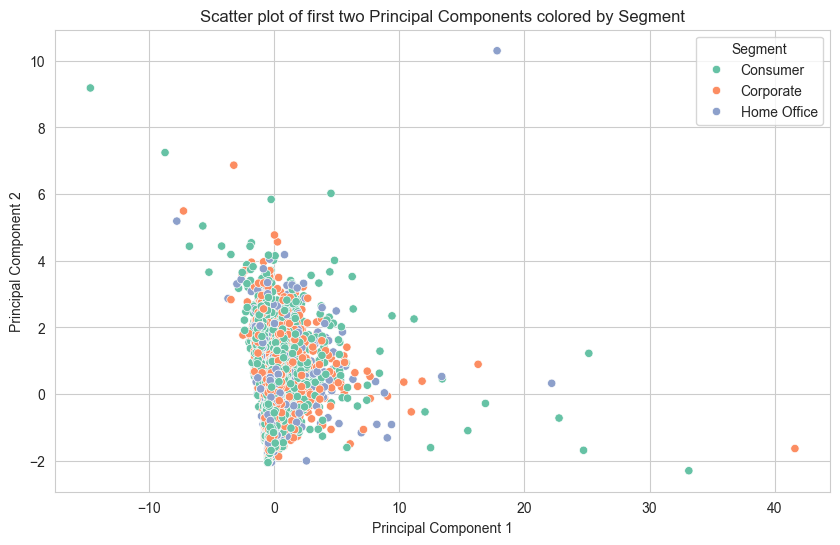

In [912]:
# in nemoodar be elat kam boodane tavanaii ha dar tafkik tavasot pc1 va pc2 khili dar ham va hata nemoodare seboodi ham im mizoo ro dorost nakard
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(5)])

df_pca['Segment'] = Market_data['Segment'].values


plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Segment', palette='Set2')
plt.title('Scatter plot of first two Principal Components colored by Segment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.show()

### 🎨 Scatter Plot of First Two Principal Components Colored by Segment

- PCA with 5 components was performed on the standardized dataset.
- The PCA results are stored in a new DataFrame (`df_pca`) with columns named `PC1` through `PC5`.
- The `Segment` column from the original dataset is added to `df_pca` for coloring the points according to their segment.
- The scatter plot visualizes the first principal component (`PC1`) on the x-axis and the second principal component (`PC2`) on the y-axis.
- The `sns.scatterplot` function is used to plot the data points with different colors representing different segments.
- The `"Set2"` color palette is used for clear distinction between segments.
- The plot includes a title, axis labels, and a legend.

**Note:**  
If the clusters in the plot are not well separated, it may be due to the limited discriminative power of the first two components.  
For better analysis, consider examining additional components or applying more advanced dimensionality reduction techniques.

This plot helps visualize how well the different segments can be separated in the PCA-transformed feature space.


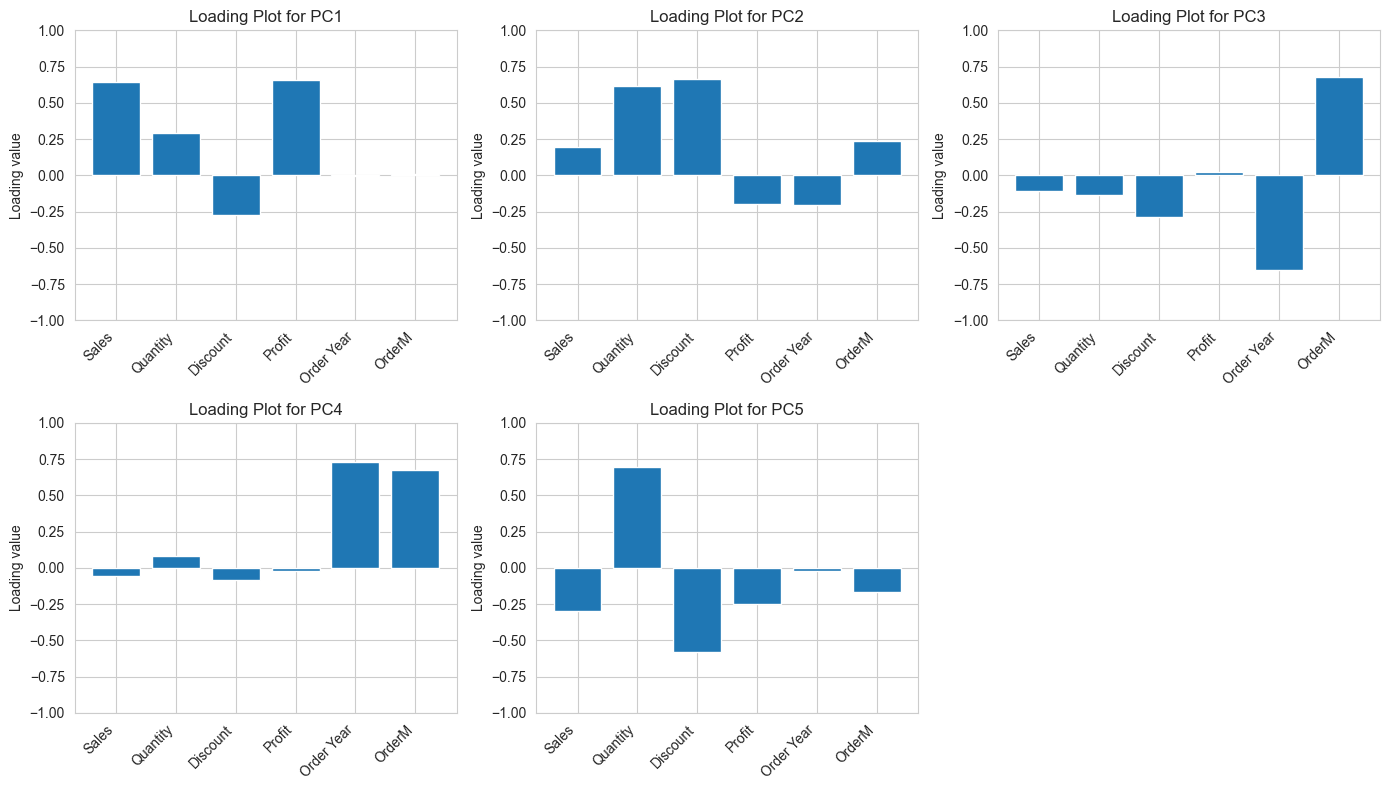

In [913]:
# nemoodare tasir har malefe adadi bar pca
loadings = pca.components_.T 
features = cols 
components = [f'PC{i+1}' for i in range(loadings.shape[1])]

plt.figure(figsize=(14,8))


for i in range(loadings.shape[1]):
    plt.subplot(2, 3, i+1) 
    plt.bar(features, loadings[:, i])
    plt.title(f'Loading Plot for {components[i]}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Loading value')
    plt.ylim(-1, 1)

plt.tight_layout()
plt.show()

### 📊 Loading Plots for Principal Components

- The **loading matrix** (`loadings`) is extracted from the PCA object.  
  It shows the contribution (weight) of each original feature to each principal component.  
  Shape: (number of features) × (number of components).

- `features` contains the names of the original columns used in PCA.  
- `components` is a list of component labels (e.g., PC1, PC2, ..., PCn).

- For each principal component, a bar plot is drawn showing the loading values of all features.  
- The x-axis lists feature names rotated for readability.  
- The y-axis shows loading values ranging from -1 to 1.  
- The plot helps identify which features strongly influence each principal component (positively or negatively).

- This visualization is crucial for interpreting the meaning of each principal component in terms of the original variables.


In [914]:
# mohasebe variance har pca
print(pca.explained_variance_ratio_)  
print(pca.explained_variance_ratio_.cumsum())


[0.2650151  0.17723033 0.16949387 0.16360018 0.14635447]
[0.2650151  0.44224543 0.61173931 0.77533949 0.92169396]


### 📈 Explained Variance Ratio of Principal Components

- `pca.explained_variance_ratio_` returns the proportion of the dataset's total variance explained by each principal component individually.  
- This tells us how much information (variance) each component captures from the original data.

- `pca.explained_variance_ratio_.cumsum()` computes the cumulative explained variance, i.e., how much total variance is explained when combining the first N components.

- Printing these values helps decide how many components to keep while balancing dimensionality reduction and information preservation.


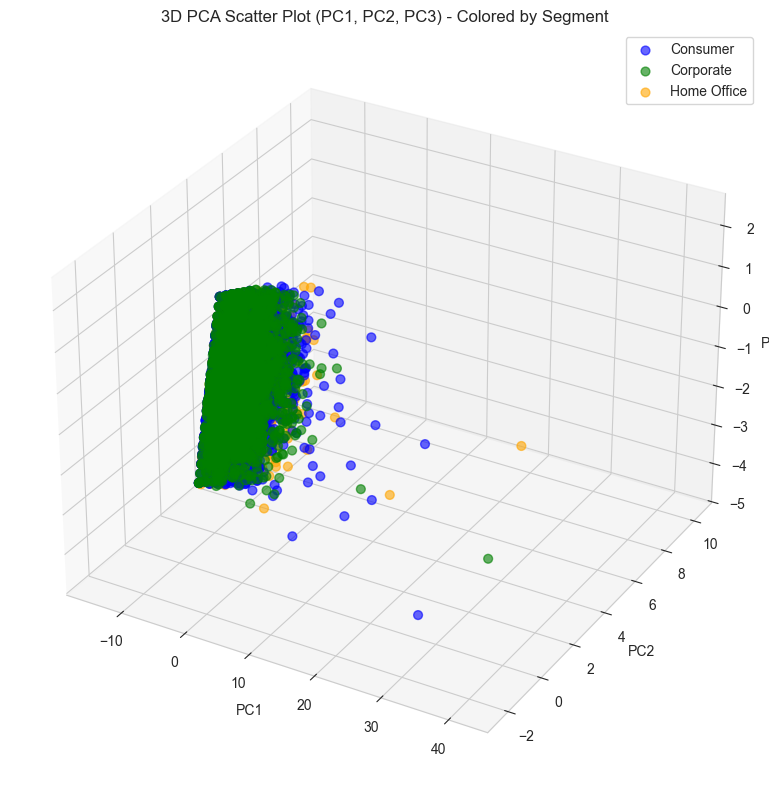

In [915]:
#nmoodare se boodi k bazam tafkik nakard
colors = {
    'Consumer': 'blue',
    'Corporate': 'green',
    'Home Office': 'orange'
}

x = df_pca['PC1']
y = df_pca['PC2']
z = df_pca['PC3']
segments = df_pca['Segment']


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for segment in segments.unique():
    idx = segments == segment
    ax.scatter(x[idx], y[idx], z[idx], 
               c=colors[segment], label=segment, s=40, alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot (PC1, PC2, PC3) - Colored by Segment')
ax.legend()
plt.tight_layout()
plt.show()

### 🌀 3D Scatter Plot of First Three Principal Components by Segment

- This 3D scatter plot visualizes the first three principal components (`PC1`, `PC2`, `PC3`) obtained from PCA.
- Points are colored according to their `Segment` to explore possible clustering or separation among groups in 3D space.
- A custom color dictionary (`colors`) assigns distinct colors to each segment (`Consumer`, `Corporate`, `Home Office`).
- The `ax.scatter` method plots points in 3D with some transparency (`alpha=0.6`) and size `s=40` for better visualization.
- Axis labels correspond to each principal component.
- The plot title and legend clarify the meaning of colors and axes.
- This 3D view may reveal better separability among segments compared to 2D plots, but if overlap remains, it indicates intrinsic similarity or insufficient discriminative power of the selected components.

**Note:**  
If separation between segments is still poor in the 3D plot, it suggests that the chosen principal components may not capture enough variance to clearly differentiate the groups.  
In such cases, consider exploring more components, applying other dimensionality reduction methods like t-SNE or UMAP, or using supervised techniques to improve class separation.
